In [2]:
import numpy as np
from scipy.stats import mode

# Define the data set with three categorical variables
data = np.array([['A', 'B', 'C'],
				['B', 'C', 'A'],
				['C', 'A', 'B'],
				['A', 'C', 'B'],
				['A', 'A', 'B']])

# Choose the number of clusters k
k = 2

# Initialize the modes for each cluster
modes = [['A', 'B', 'C'],
		['C', 'B', 'A']]

# Initialize the cluster assignments for each data objects
clusters = np.zeros(data.shape[0], dtype=int)
clusters_prev = np.zeros(data.shape[0], dtype=int)

# Iteratively assign data objects to
# their clusters and update the cluster modes
for i in range(10):
	# Assign data objects to the closest cluster
	for j, object in enumerate(data):
		distances = np.array([sum(object != mode) for mode in modes])
		clusters[j] = np.argmin(distances)

	# Update the cluster modes
	for j in range(k):
		modes[j] = mode(data[clusters == j]).mode[0]

	# Check if the cluster assignments have converged
	if (clusters == clusters_prev).all():
		break

	# Store the current cluster assignments
	clusters_prev = clusters

# Print the cluster assignments for each data point
print("The cluster assignments for each data object: ", clusters)

# Print the modes for each cluster
print("Modes for each cluster: ", modes)


TypeError: ignored

In [3]:
!pip install kmodes


    Customer ID    Skin Type Product Type             Brand Price Range
0             1         Oily  Moisturizer        Neutrogena  Affordable
1             2          Dry     Cleanser          Cetaphil   Mid-Range
2             3  Combination        Serum      The Ordinary  Affordable
3             4    Sensitive    Sunscreen    La Roche-Posay   Mid-Range
4             5         Oily  Moisturizer            CeraVe  Affordable
5             6  Combination     Cleanser              Olay  Affordable
6             7          Dry        Serum      Estee Lauder      Luxury
7             8    Sensitive    Sunscreen            Aveeno   Mid-Range
8             9  Combination  Moisturizer           Kiehl's   Mid-Range
9            10         Oily     Cleanser           Garnier  Affordable
10           11    Sensitive        Serum      Sunday Riley      Luxury
11           12  Combination    Sunscreen          Bioderma   Mid-Range
12           13          Dry  Moisturizer     L'Oreal Paris  Aff

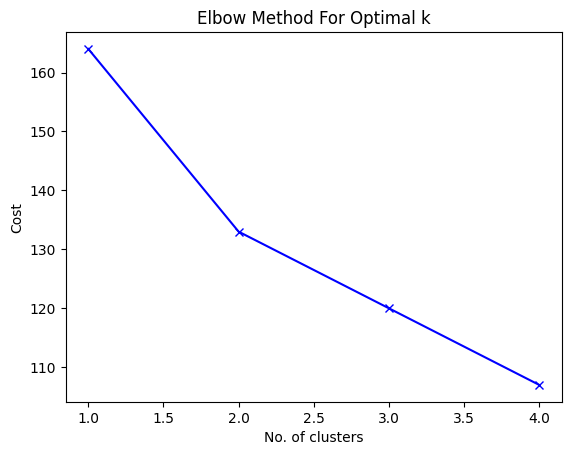

In [6]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset
data = pd.read_csv("skincare.csv")
print(data)

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()



In [7]:
# Building the model with 2 clusters
kmode = KModes(n_clusters=2, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
print(clusters)

data.insert(0, "Cluster", clusters, True)
print(data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15, cost: 139.0
Run 1, iteration: 2/100, moves: 1, cost: 139.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4, cost: 135.0
Run 2, iteration: 2/100, moves: 0, cost: 135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 4, cost: 135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 136.0
Best run was number 2
[1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 1]
    Cluster  Customer ID    Skin Type Product Type             Brand  \
0         1            1         Oily  Moisturizer        Neutrogena   
1         0    